In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
df=pd.read_csv(r"C:\Users\Bhavani\OneDrive\Documents\ml-tekwork\Unsupervised\Anomaly-Detection\embedded_system_network_security_dataset.csv")
df.head()


,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [11]:
df.describe()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.00000
mean,0.502446,0.512259,32024.617000,199.769000,0.506857,0.0,0.495222,0.485651,0.10000
std,0.289606,0.281130,18520.890349,180.078488,0.303271,0.0,0.292927,0.295953,0.30015
min,0.000000,0.000000,1038.000000,53.000000,0.000000,0.0,0.000000,0.000000,0.00000
25%,0.256263,0.275909,16245.250000,53.000000,0.267857,0.0,0.236912,0.228039,0.00000
50%,0.499642,0.515971,31883.000000,80.000000,0.500000,0.0,0.504290,0.467905,0.00000
75%,0.741410,0.746523,47746.250000,443.000000,0.785714,0.0,0.761556,0.750876,0.00000
max,1.000000,1.000000,65484.000000,443.000000,1.000000,0.0,1.000000,1.000000,1.00000


In [12]:
df.isnull().sum()

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

In [ ]:
# step2 : Data Preprocessing
# drop label olumns
X=df.drop(df['label'])
Y=df['label']
#if columns is bool type then conver to int type
for col in df.columns:
    if df[col].dtype=='bool':
        df[col]=df[col].astype(int)
#

In [ ]:
features=[]

In [29]:
# Feature Engineering 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X)
scaled_features_df=pd.DataFrame(scaled_features,columns=X.columns)
scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.953702,-0.095339,1.813265,-0.663270,-0.727544,0.0,1.229922,-1.533206,-0.333704,-0.672825,1.351738,-0.679118,-0.715626,1.400509,-0.72204,-0.579664,-0.553428,-0.585835
1,0.244546,-0.216804,1.067940,-0.813404,-1.198878,0.0,-1.168592,-1.065862,-0.333704,-0.672825,-0.739788,-0.679118,1.397377,-0.714026,-0.72204,-0.579664,-0.553428,-0.585835
2,0.513843,1.340247,-0.273287,-0.813404,0.686456,0.0,1.464736,0.226465,-0.333704,1.486272,-0.739788,-0.679118,1.397377,-0.714026,-0.72204,-0.579664,1.806919,-0.585835
3,0.227252,-1.083636,-1.587682,-0.813404,1.393456,0.0,-1.304736,0.328921,-0.333704,1.486272,-0.739788,1.472499,-0.715626,-0.714026,-0.72204,-0.579664,-0.553428,-0.585835
4,0.239605,-0.526444,-0.940493,-0.813404,0.686456,0.0,1.295746,0.931638,-0.333704,-0.672825,-0.739788,1.472499,-0.715626,-0.714026,-0.72204,-0.579664,1.806919,-0.585835


In [33]:
from sklearn.ensemble import IsolationForest

# Example values
n_estimators = 100
max_samples = 'auto'
contamination = 0.04
sample_size=256

# Train model
model = IsolationForest(
    n_estimators=n_estimators,
    contamination=contamination,
    max_samples=sample_size,
    random_state=42
)

# Fit on features
model.fit(scaled_features)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomaly_labels = model.predict(scaled_features)

# Add anomaly column
scaled_features_df['anomaly'] = anomaly_labels




In [34]:
print(scaled_features_df['anomaly'].value_counts())

anomaly
 1    958
-1     40
Name: count, dtype: int64


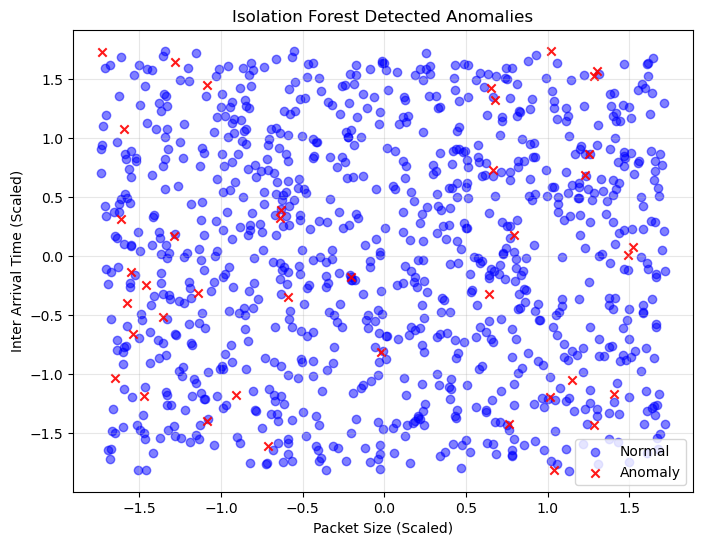

In [35]:
normal = scaled_features_df[scaled_features_df['anomaly'] == 1]
anomaly = scaled_features_df[scaled_features_df['anomaly'] == -1]

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Normal points
plt.scatter(
    normal['packet_size'],
    normal['inter_arrival_time'],
    color='blue',
    alpha=0.5,
    label='Normal'
)

# Anomalies
plt.scatter(
    anomaly['packet_size'],
    anomaly['inter_arrival_time'],
    color='red',
    marker='x',
    alpha=0.9,
    label='Anomaly'
)

plt.xlabel("Packet Size (Scaled)")
plt.ylabel("Inter Arrival Time (Scaled)")
plt.title("Isolation Forest Detected Anomalies")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


In [ ]:
import joblib
joblib.dump(model,'ifm.pkbl')

['ifm.pkbl']

In [32]:
print(scaled_features_df.columns)


Index(['packet_size', 'inter_arrival_time', 'src_port', 'dst_port',
       'packet_count_5s', 'mean_packet_size', 'spectral_entropy',
       'frequency_band_energy', 'label', 'protocol_type_TCP',
       'protocol_type_UDP', 'src_ip_192.168.1.2', 'src_ip_192.168.1.3',
       'dst_ip_192.168.1.5', 'dst_ip_192.168.1.6', 'tcp_flags_FIN',
       'tcp_flags_SYN', 'tcp_flags_SYN-ACK'],
      dtype='object')
